In [49]:
%matplotlib notebook

In [50]:
# loading standard modules
import numpy as np
import matplotlib.pyplot as plt
import maxflow
from skimage import img_as_ubyte
from scipy import ndimage, signal 
from math import exp
from skimage.color import rgb2grey
# loading custom module (requires file asg1.py in the same directory as the notebook file)
from asg1 import Figure, GraphCutsPresenter

In [51]:
class MyGraphCuts_8:
    
    bgr_value = 0
    obj_value = 1
    none_value = 2
    def __init__(self,img,sigma):
        self.fig = Figure()
        self.pres = GraphCutsPresenter(img, self)
        self.pres.connect_figure(self.fig)
        self.img = img
        self.num_rows = img.shape[0]
        self.num_cols = img.shape[1]
        #setting up a inifite values for the terminal edge weight
        self.inif = np.inf
        self.sigma = sigma
        #8- neighbors graph 
        self.neighbor_xs = [0, 1, 1,  1,  0, -1, -1, -1]
        self.neighbor_ys = [1, 1, 0, -1, -1, -1,  0,  1]
        self.num_neighbors = len(self.neighbor_xs)
        
    def run(self):
        self.fig.show()

    def compute_labels(self, seed_mask):
        
        num_cols = self.num_cols
        num_rows = self.num_rows
         #convert the image into gray image
        img = img_as_ubyte(rgb2grey(self.img)) 
        
        #create the graph using the maxflow libaries 
        graph = maxflow.Graph[float](self.num_rows, self.num_cols)
        nodes = graph.add_grid_nodes((self.num_rows, self.num_cols))
        
        #looping through all the pixals in the piture,calcuate the n-links and 
        #add that to our graph
        for x in range(num_rows):  
            for y in range(num_cols):
                for k in xrange(self.num_neighbors):
                    nx = x + self.neighbor_xs[k]
                    ny = y + self.neighbor_ys[k]
                    #test to see if the the pixal point is out of the picture
                    if nx < 0 or ny < 0 or nx >= self.num_rows or ny >= self.num_cols:
                        continue 
                    weight_n = exp(-((img[nx,ny] - img[x,y])/(2*self.sigma**2)))
                    #add in the n-links
                    graph.add_edge(nodes[x,y], nodes[nx,ny], weight_n,0)
#       Find from the seed mask where the background and object is           
        objectSpace = np.transpose(np.where(seed_mask == 1))
        backgroundSpace = np.transpose(np.where(seed_mask == 0))
#       loop through those points and add t-link
        for i in objectSpace:
            graph.add_tedge(nodes[i[0],i[1]],0,self.inif)
        for j in backgroundSpace:
            graph.add_tedge(nodes[j[0],j[1]],self.inif,0)
        #Compute the max-flow using the library
        graph.maxflow()
        label_mask = graph.get_grid_segments(nodes)
        return label_mask      

In [52]:
class MyGraphCuts_4:
    
    bgr_value = 0
    obj_value = 1
    none_value = 2
    def __init__(self,img,sigma):
        self.fig = Figure()
        self.pres = GraphCutsPresenter(img, self)
        self.pres.connect_figure(self.fig)
        self.img = img
        self.num_rows = img.shape[0]
        self.num_cols = img.shape[1]
        #setting up a inifite values for the terminal edge weight
        self.inif = np.inf
        self.sigma = sigma
        #4- neighbors graph 
        self.neighbor_xs = [0,1,0,-1]
        self.neighbor_ys = [1,0,-1,0]
        self.num_neighbors = len(self.neighbor_xs)
        
    def run(self):
        self.fig.show()

    def compute_labels(self, seed_mask):
        
        num_cols = self.num_cols
        num_rows = self.num_rows
         #convert the image into gray image
        img = img_as_ubyte(rgb2grey(self.img)) 
        
        #create the graph using the maxflow libaries 
        graph = maxflow.Graph[float](self.num_rows, self.num_cols)
        nodes = graph.add_grid_nodes((self.num_rows, self.num_cols))
        
        #looping through all the pixals in the piture,calcuate the n-links and 
        #add that to our graph
        for x in range(num_rows):  
            for y in range(num_cols):
                for k in xrange(self.num_neighbors):
                    nx = x + self.neighbor_xs[k]
                    ny = y + self.neighbor_ys[k]
                    #test to see if the the pixal point is out of the picture
                    if nx < 0 or ny < 0 or nx >= self.num_rows or ny >= self.num_cols:
                        continue 
                    weight_n = exp(-((img[nx,ny] - img[x,y])/(2*self.sigma**2)))
                    #add in the n-links
                    graph.add_edge(nodes[x,y], nodes[nx,ny], weight_n,0)
#       Find from the seed mask where the background and object is           
        objectSpace = np.transpose(np.where(seed_mask == 1))
        backgroundSpace = np.transpose(np.where(seed_mask == 0))
#       loop through those points and add t-link
        for i in objectSpace:
            graph.add_tedge(nodes[i[0],i[1]],0,self.inif)
        for j in backgroundSpace:
            graph.add_tedge(nodes[j[0],j[1]],self.inif,0)
        #Compute the max-flow using the library
        graph.maxflow()
        label_mask = graph.get_grid_segments(nodes)
        return label_mask      

<IPython.core.display.Javascript object>


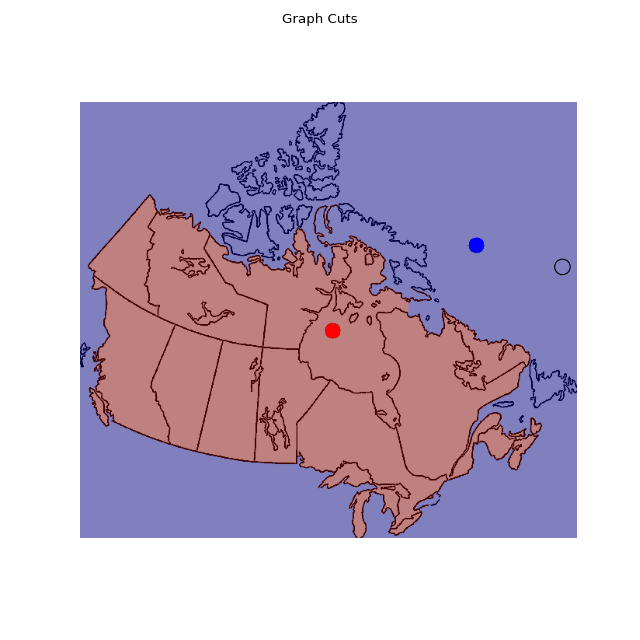

In [57]:
img = plt.imread('images/canada.bmp')
app = MyGraphCuts_4(img,1)
app.run()

        

<IPython.core.display.Javascript object>


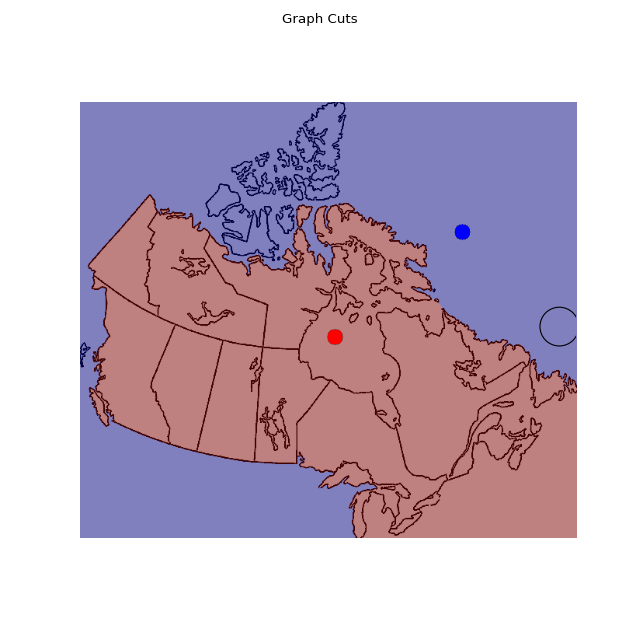

In [55]:
img = plt.imread('images/canada.bmp')
app = MyGraphCuts_8(img,1)
app.run()



# The difference between 4 neighbours graph and 8 neibours

Using the same sigma running on 4 neighbours and 8 neighbours graph we can see some differences.


1.The running speed is faster with 4 neighbours graph compared with 8 neighbours. It’s because there are more n-links to add on for the 8 neighbours graph which results in this difference.

2.There is a difference around the edges area comparing 4 neighbours graph and 8 neighbours. The 4 neighbours seems to mark edges more shape while 8 neighbours is more smooth. It is because the graph is more connected in the 8 neighbours graph. And the main difference between the two in this run is the bottom right side of the picture, where in 8 neighbours graph, somehow it leaks in.

# Choose of the large enough finite cost t-links


For the simplicity reason, to choose the T-link values, I chose a np parameter whihc is inf, which is guarantee to be larger than all the weight in the picture. If this option isn’t available, I’d choose a arbitrary large enough number like 99999999999 for the constraint. The larger t value, the better the result may be.

# Results of different sigma values

1. sigma = 5

2. sigma = 30

3. signma = 15

4. sigma = 2



<IPython.core.display.Javascript object>


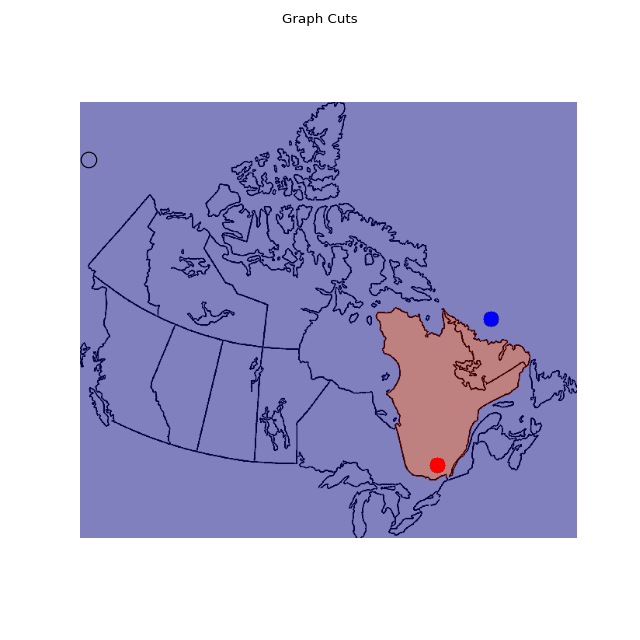

In [58]:
img = plt.imread('images/canada.bmp')
app = MyGraphCuts_4(img,5)
app.run()

<IPython.core.display.Javascript object>


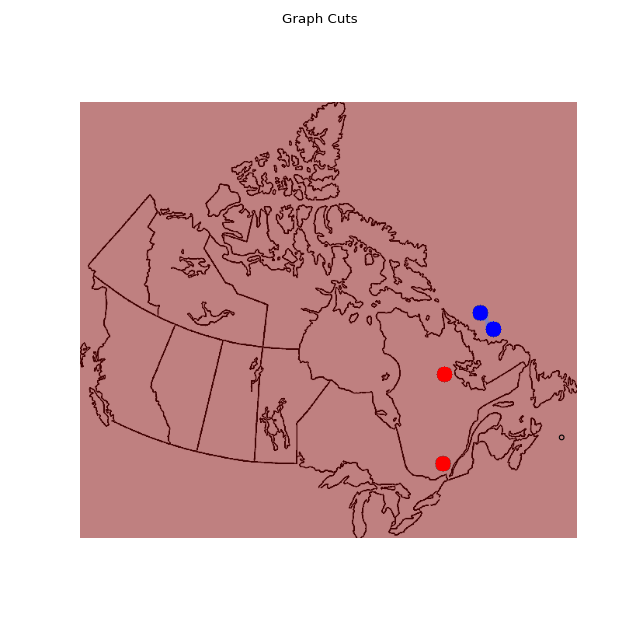

In [59]:
img = plt.imread('images/canada.bmp')
app = MyGraphCuts_4(img,30)
app.run()

<IPython.core.display.Javascript object>


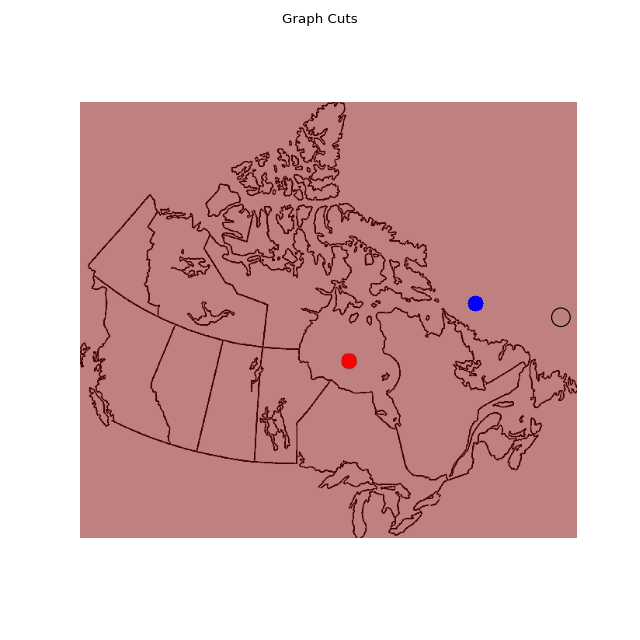

In [62]:
img = plt.imread('images/canada.bmp')
app = MyGraphCuts_4(img,15)
app.run()


<IPython.core.display.Javascript object>


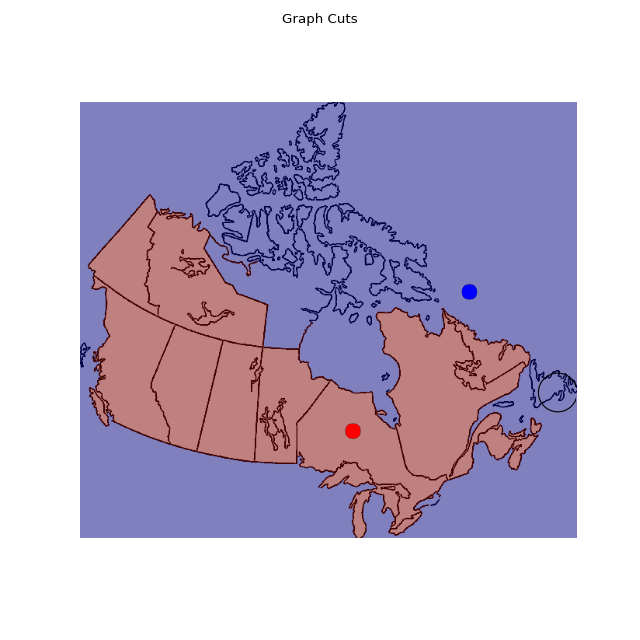

In [61]:
img = plt.imread('images/canada.bmp')
app = MyGraphCuts_4(img,2)
app.run()

# Observations for different sigmas

Based on the observation of different sigma values, we can see that when sigma increased, it will at one point unable to do the graph cuts. My observation is that, for weight function, the sigma is denominator inside the exponent, and we take the sigma^2 value. But the exponential function is using the negative value of that, which means the larger value sigma is, the larger the weight is going to be. Once the weight between n-links exceed the T-links hard constraint, the graph cut would work poorly or even not working. Because it is growing in a exponential speed, hence it’s probably better to carefully choose small values of sigma. Or pick a really really large number for T-links.

# Recommend a strategy for automatically selecting a "good" value of parameter sigma 


1. To choose a "good" value of parameter sigma needs to be based on what measurement we use for the n-links. If it is measured with intensity, or gradient, we can have preset good values of sigma table for that sort of images to help determine a good value for similar pictures. Basically, having some example pictures and build program to detect similarities and pick corresponding sigma




In [ ]:
# Simi